# Assignment 2: Classification

### <font color='red'>Practice Homework. No submission is needed.</font> 

In [1]:
NAME = "Winston Shih"

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data
For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. We need to convert the categorical variables (b, c, x, f...) into numeric indicators (such as 0, 1, 2, 3 ...). One way to achieve this is by using the LabelEncoder() function, which will create indicator variables for each category in the data, effectively converting them to a numeric representation that can be used by the algorithms in sklearn.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

mushrooms = pd.read_csv('mushrooms.csv')

# Preprocess the Data
label_encoder = LabelEncoder()
mushroom_data_encoded = mushrooms.apply(label_encoder.fit_transform)
mushroom_data_encoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [4]:
# Separate features and target variable
X_mush = mushroom_data_encoded.iloc[:,1:]
y_mush = mushroom_data_encoded.iloc[:,0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_mush, y_mush, random_state=0)

In [5]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6093, 22), (6093,), (2031, 22), (2031,))

### Question 1 (15 points)
- Train a logistic regression classifier and L2 regularization. Set random_state as 0. 
- Report (1) Report the coefficients (including intercept), (2) the accuracy of training and test set.
- Create (3) a confusion matrix for the logistic regression model, report the TP, FP, TN, FN.

In [7]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier with L2 regularization
logreg = LogisticRegression(penalty='l2', random_state=0)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)
 
# Calculate accuracy
print(f"Training Set Accuracy: {logreg.score(X_train_scaled, y_train):.2f}")
print(f"Test Set Accuracy: {logreg.score(X_test_scaled, y_test):.2f}")


Training Set Accuracy: 0.96
Test Set Accuracy: 0.95


In [8]:
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_pred)

print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 912
TN is: 1019
FP is: 42
FN is: 58


### Question 2 (15 points)
- Train a DecisionTreeClassifier with default parameters and random_state=0. 
- What are the 5 most important features found by the decision tree?

<BarContainer object of 22 artists>

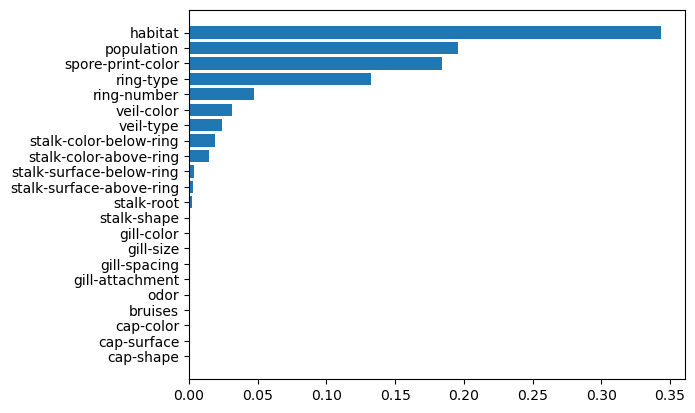

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Train a DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

# Get feature importances
my_x = X_mush.columns
my_y = dt_clf.feature_importances_

my_y.sort()

plt.barh(my_x, my_y)

### Question 3 (15 points)
- Train a Decision Tree model. Set "max_depth" to 6, "min_samples_split" to 2, "max_leaf_nodes" to  10, and random_state to 0.
- Report the test accuracy of the decision tree model.

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model with specified hyperparameters
dt_clf_2 = DecisionTreeClassifier(max_depth=6, min_samples_split=2, max_leaf_nodes=10, random_state=0)
dt_clf_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf_2.predict(X_test)

# Calculate accuracy
print(f"Test Set Accuracy of Decision Tree: {dt_clf_2.score(X_test, y_test):.2f}")

Test Set Accuracy of Decision Tree: 0.97


### Question 4 (15 points)
Let random_state = 0. Suppose we use Voting classifier to combine the result of three classifiers: (1) Logistic Regression, (2) decision tree (criterion='entropy'), and (3) Naive Bayes. 
- What is the model performance of the voting classifier? 
- What is the model performance of each classifier by itself?

In [11]:
# S1: Define Functions/Estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(random_state=0)
dt_clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
nbg_clf = GaussianNB()



# S2: Apply Voting Classifier
from sklearn.ensemble import VotingClassifier

# define voting classifier
voting_clf = VotingClassifier(estimators = [('lr1', log_clf), ('dt', dt_clf), ('nbg', nbg_clf)], voting ='hard')



# S3: train the model
voting_clf.fit(X_train, y_train)

# Performance Measure
print("Test score for voting classifier is:", voting_clf.score(X_test, y_test))

Test score for voting classifier is: 0.9611029049729197


In [12]:
for clf in (log_clf, nbg_clf, dt_clf, voting_clf):
         clf.fit(X_train, y_train)
         print(clf.__class__.__name__, clf.score(X_test, y_test))

LogisticRegression 0.9502708025603152
GaussianNB 0.914327917282127
DecisionTreeClassifier 1.0
VotingClassifier 0.9611029049729197


### Question 5 (20 points)
- Train a random forest classifier with grid search and cross-validation. Set random_state as 0. Let the choices of n_estimators be: [10, 50, 100, 150]. Use 5-fold cross-validation.
- Report (1) the best n_estimators chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model).

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=0)

# Define the parameter grid for grid search
param_grid = {'n_estimators': [10, 50, 100, 150]}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy')

In [14]:
print(f"Best n_estimators: {grid_search.best_params_}")
print(f"Test Accuracy under the best model: {grid_search.score(X_test, y_test)}")
print(f"Mean Validation Accuracy through cross-validation: {grid_search.best_score_}")

Best n_estimators: {'n_estimators': 10}
Test Accuracy under the best model: 1.0
Mean Validation Accuracy through cross-validation: 1.0


### Question 6 (20 points)
In this question, apply an unsupervised learning (KMeans) to cluster similar data points together. First, drop the "class" category and consider only the input. Then scale all the input features using StandardScaler before applying clustering algorithms. 
- Show (1) a K-Means clustering algorithm to group similar data points.
- Print (2) the Predicted Labels, Performance Score, and Centers of the generated clusters.

In [15]:
# Choose Features
X = mushroom_data_encoded.drop("class", axis=1)

# Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cls_predict = kmeans.predict(X_scaled)

In [17]:
print("Predicted Labels:", cls_predict)
print("Performance Score:", kmeans.score(X))
print("Cluster Centers: \n", kmeans.cluster_centers_)

Predicted Labels: [0 0 0 ... 0 1 0]
Performance Score: -1886033.4118228194
Cluster Centers: 
 [[ 0.00446761 -0.15466186  0.16382352  0.23507454 -0.20116251 -0.04596889
   0.1148392  -0.41872147  0.36221056 -0.22738921  0.29204088  0.03866943
   0.03906748 -0.10394227 -0.099646    0.         -0.04008231  0.06703899
   0.35848979 -0.40071281 -0.07733762 -0.07842401]
 [-0.01583155  0.5480635  -0.58052898 -0.83301582  0.71284432  0.16289645
  -0.40694698  1.48379151 -1.28353808  0.8057819  -1.03488311 -0.13702992
  -0.13844046  0.36833233  0.35310798  0.          0.14203663 -0.237561
  -1.27035307  1.41997559  0.27405546  0.27790522]]
